# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
# if os.path.isfile("test_data.csv"):
#     filepath = "test_data.csv"
#     print("loading from file")

test_data = pd.read_csv("gapminder_internet.csv") #pd.read_excel("test_data.xlsx")
print("done")


done


Maps of all countries with values

In [6]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Function to create the map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    fig = go.Figure()

    trace = go.Choropleth(
        locations=data['country'],
        locationmode='country names',
        z=z_data,
        text=data['country'],
        hovertemplate="<b>%{text}</b><br><br>" +
                    title + ": %{z:.2f}<extra></extra>",
        colorscale=colorscale,
        reversescale=reversescale,  # Set reversescale to True for income data
        colorbar=dict(title=colorbar_title),
        marker_line_color='darkgray',
        marker_line_width=0.5
    )

    fig.add_trace(trace)

    fig.update_geos(
        visible=False,
        showcountries=True,
        showcoastlines=True,
        projection_type="mercator"
    )

    fig.update_layout(
        title=title,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="mercator"
        ),
        annotations=[
            dict(
                x=0.5,
                y=-0.1,
                xref='paper',
                yref='paper',
                text='Search a country:',
                showarrow=False,
                font=dict(size=14)
            )
        ],
        margin=dict(l=0, r=0, t=30, b=0),  # Adjust the margins
        width=1200,  # Adjust the width of the map box
        height=900  # Adjust the height of the map box
    )

    return fig

# Create a custom color scale with values from 20k to the lowest value fading to white
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],  # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']
]

# Define the 'data' dictionary containing the necessary columns
data = {
    'country': df['country'],
    'incomeperperson': df['incomeperperson'],
    'internetuserate': df['internetuserate'],
    'urbanrate': df['urbanrate']
}

# Create the first world map for income per person with the custom color scale and the color scale reversed
fig1 = create_map_figure(
    z_data=data['incomeperperson'].clip(upper=90000),
    colorscale=red_scale,
    title="Income per Person",
    colorbar_title="Income per Person",
    reversescale=False  # Set reversescale to True for income data
)

# Create the second world map for internet usage rate
fig2 = create_map_figure(
    z_data=data['internetuserate'],
    colorscale='Blues',
    title="Internet Usage Rate",
    colorbar_title="Internet Usage Rate"
)

# Create the third world map for urban rate
fig3 = create_map_figure(
    z_data=data['urbanrate'],
    colorscale='Greens',
    title="Urban Rate",
    colorbar_title="Urban Rate"
)

# Display the maps side by side
display(fig1)
display(fig2)
display(fig3)


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\4250571667.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\4250571667.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



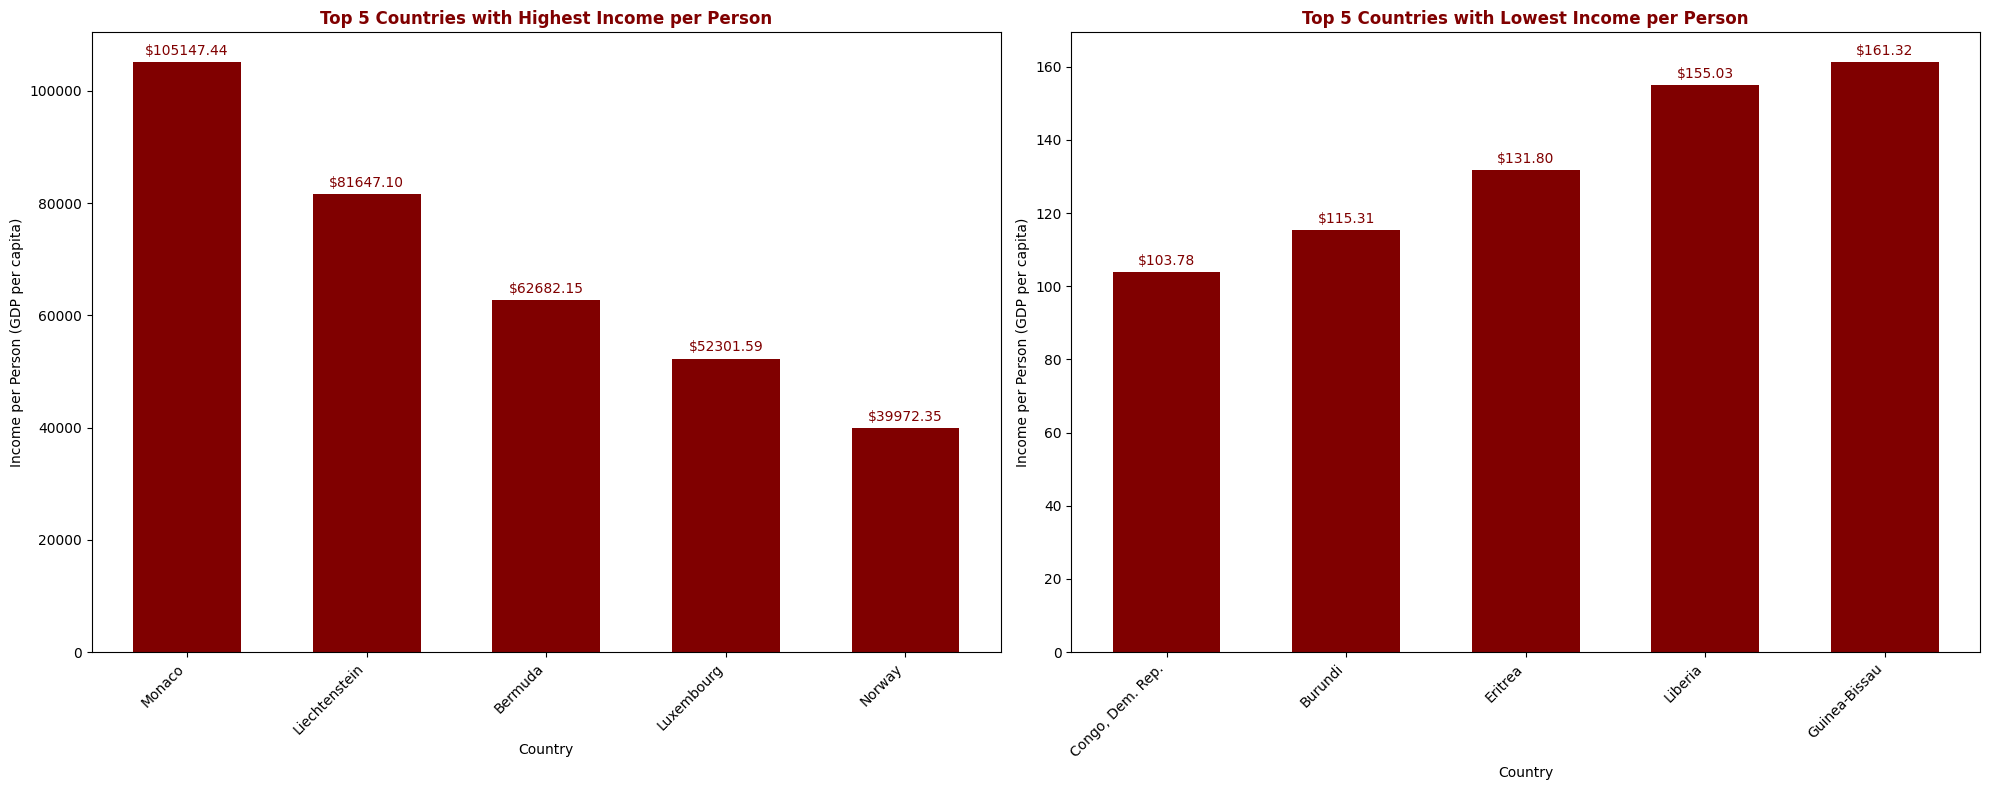

In [7]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Income per Person)
bars_high_income = axes[0].bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Income per Person (GDP per capita)')
axes[0].set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes[0].set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes[0].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Plot the second bar graph (Top 5 Countries with Lowest Income per Person)
bars_low_income = axes[1].bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                            color='#800000', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Income per Person (GDP per capita)')
axes[1].set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes[1].set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes[1].annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\2263563953.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\2263563953.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



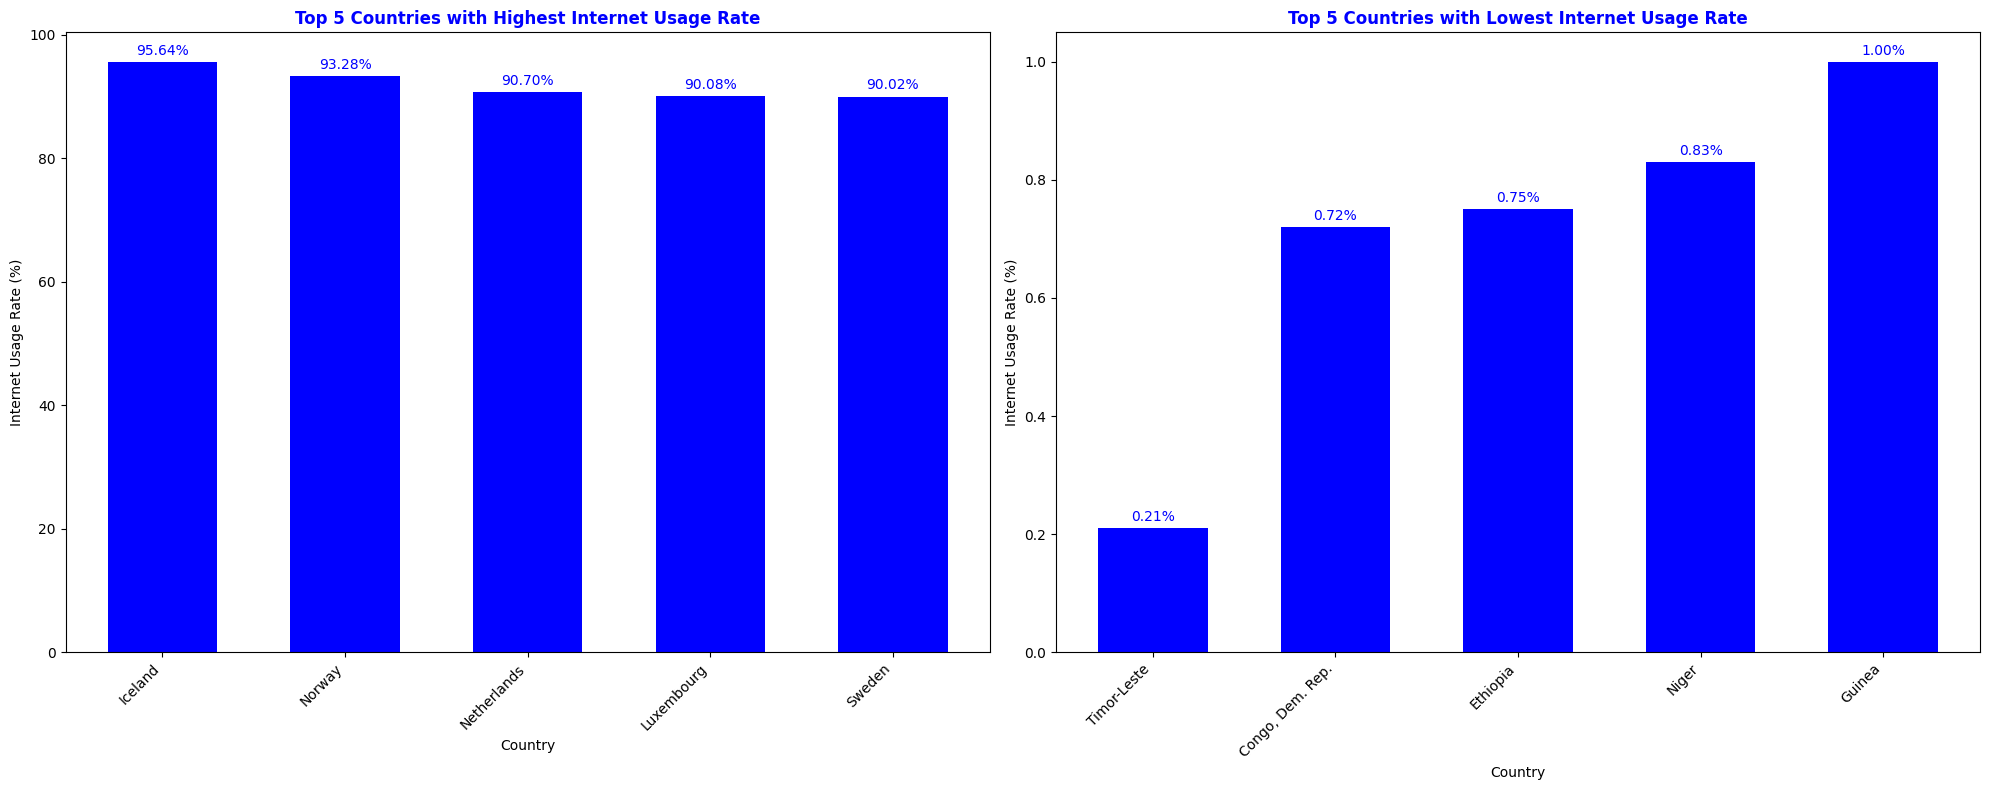

In [8]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Internet Usage Rate)
bars_high_internet = axes[0].bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                                color='blue', width=0.6)

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Internet Usage Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes[0].set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_internet:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Plot the second bar graph (Top 5 Countries with Lowest Internet Usage Rate)
bars_low_internet = axes[1].bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                            color='blue', width=0.6)

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Internet Usage Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes[1].set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_internet:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\333851838.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\333851838.py:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



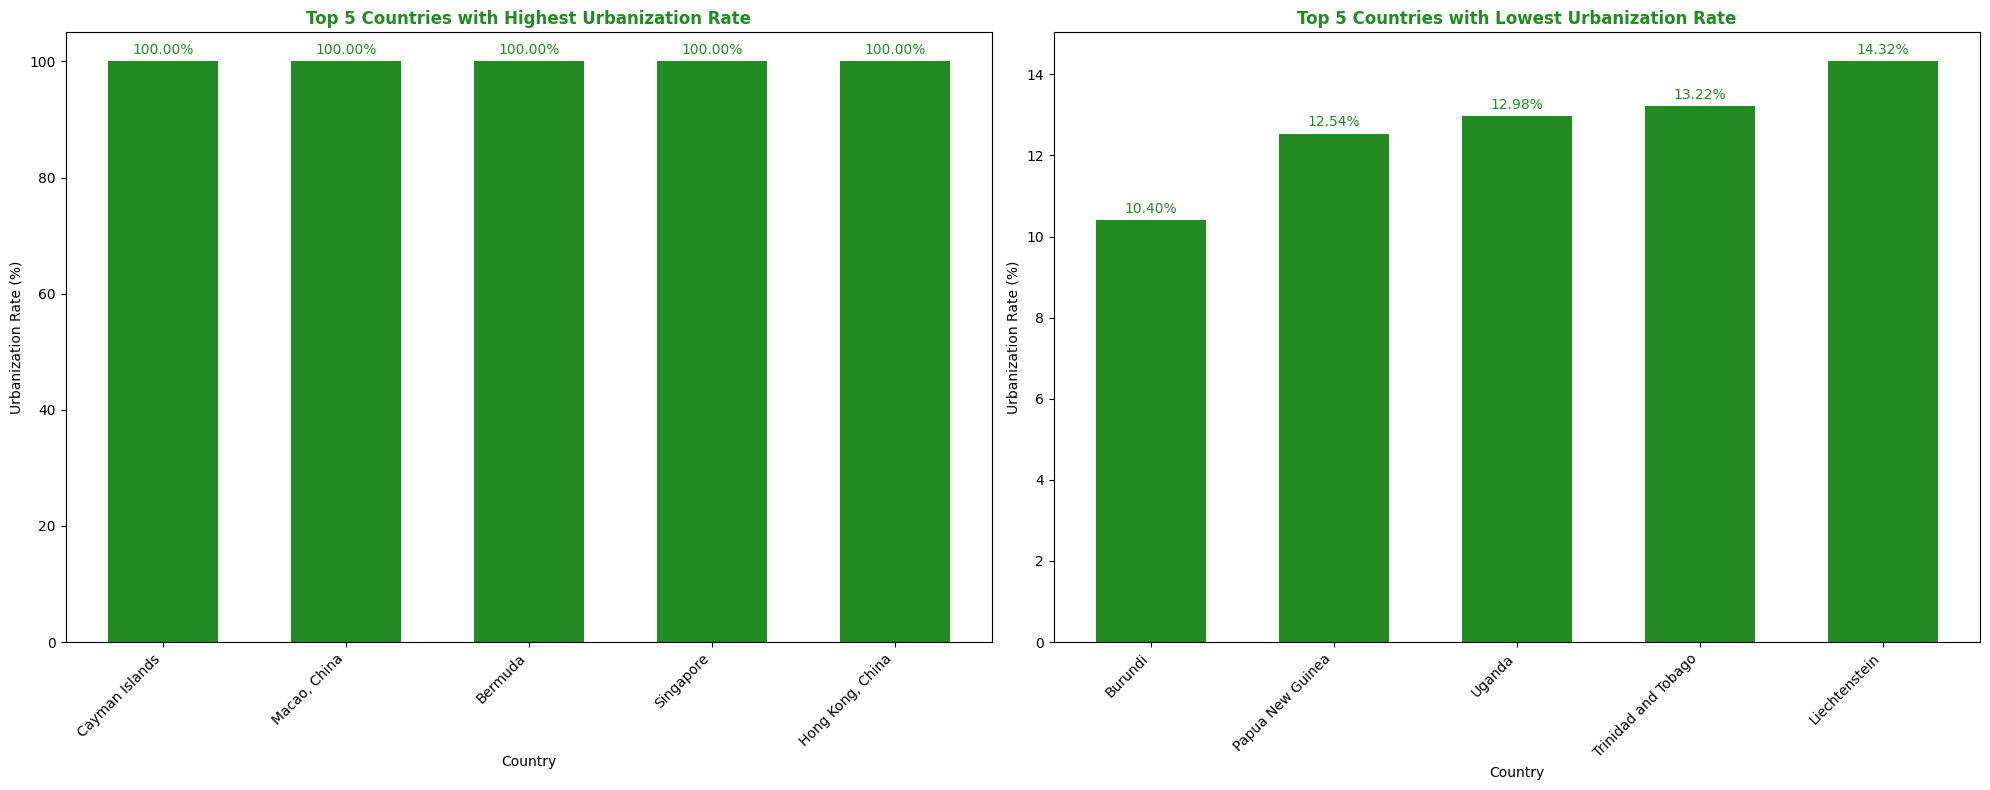

In [9]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Urbanization Rate)
bars_high_urban = axes[0].bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the first plot
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Urbanization Rate (%)')
axes[0].set_title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
axes[0].set_xticklabels(sorted_df_high_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the first plot
for bar in bars_high_urban:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Plot the second bar graph (Top 5 Countries with Lowest Urbanization Rate)
bars_low_urban = axes[1].bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'],
                            color='#228B22', width=0.6)  # Increase the width for spacing

# Add labels and title to the second plot
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Urbanization Rate (%)')
axes[1].set_title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
axes[1].set_xticklabels(sorted_df_low_urban['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar in the second plot
for bar in bars_low_urban:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#228B22')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


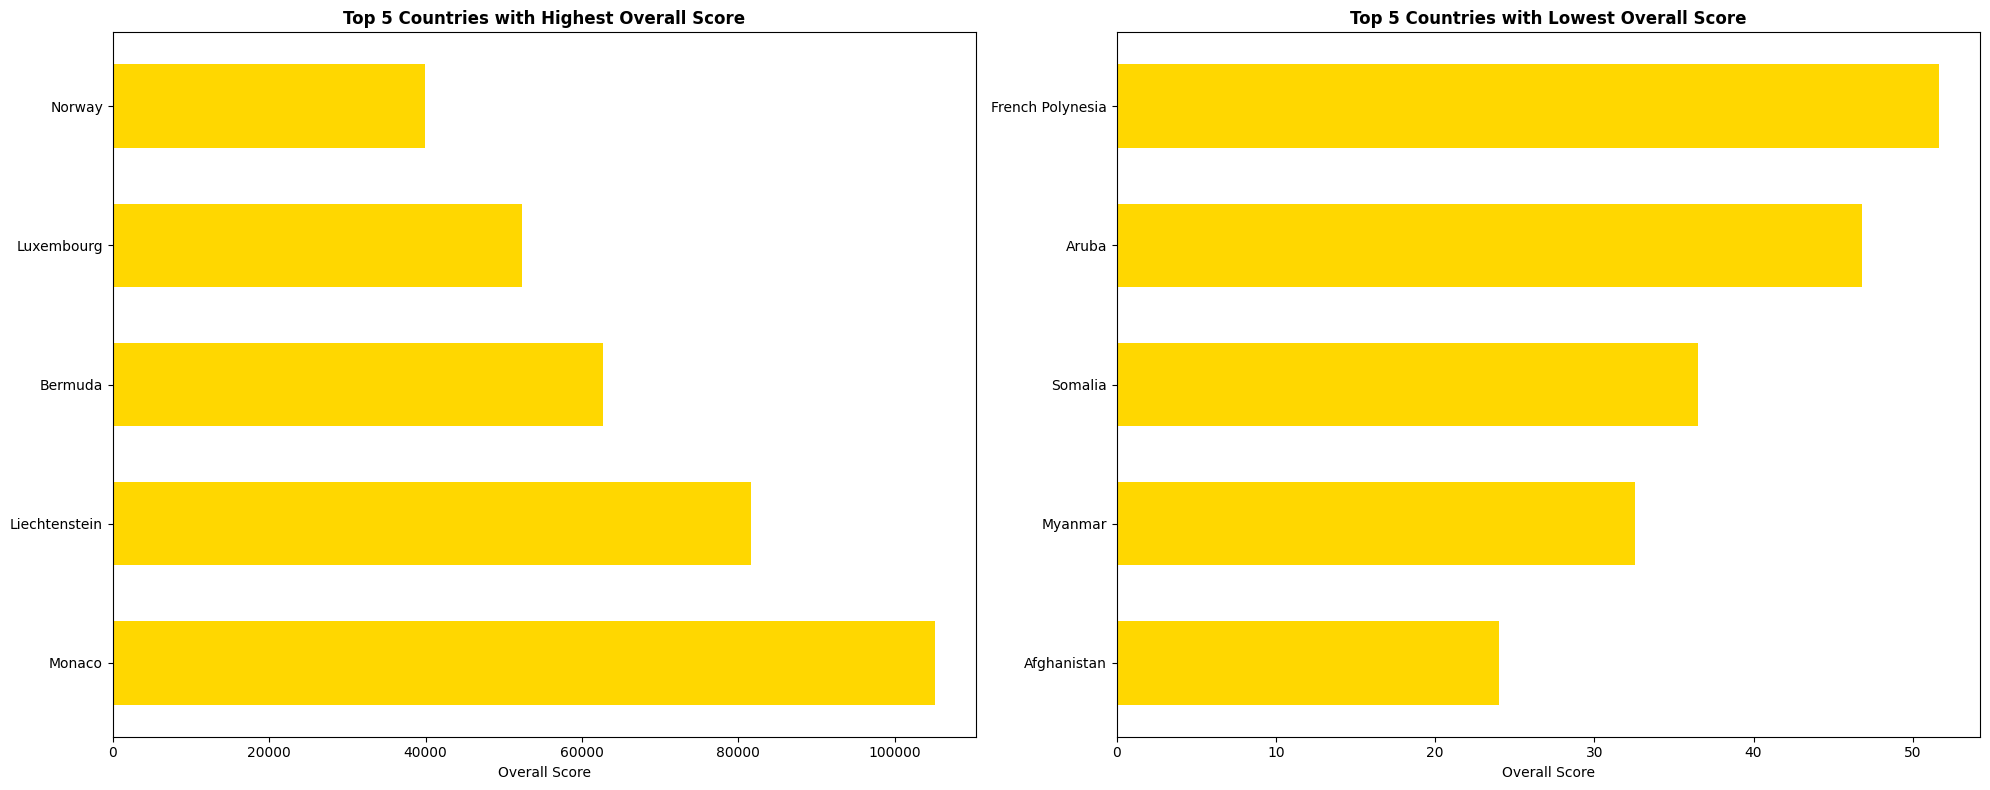

In [10]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Calculate the overall score for each country
df['Overall_Score'] = df[['incomeperperson', 'internetuserate', 'urbanrate']].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first bar graph (Top 5 Countries with Highest Overall Score)
bars_high_score = axes[0].barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'],
                              color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the first plot
axes[0].set_xlabel('Overall Score')
axes[0].set_title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

# Plot the second bar graph (Top 5 Countries with Lowest Overall Score)
bars_low_score = axes[1].barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'],
                             color='#FFD700', height=0.6)  # Darker Yellow color

# Add labels and title to the second plot
axes[1].set_xlabel('Overall Score')
axes[1].set_title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\2843338407.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\2843338407.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_54608\2843338407.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

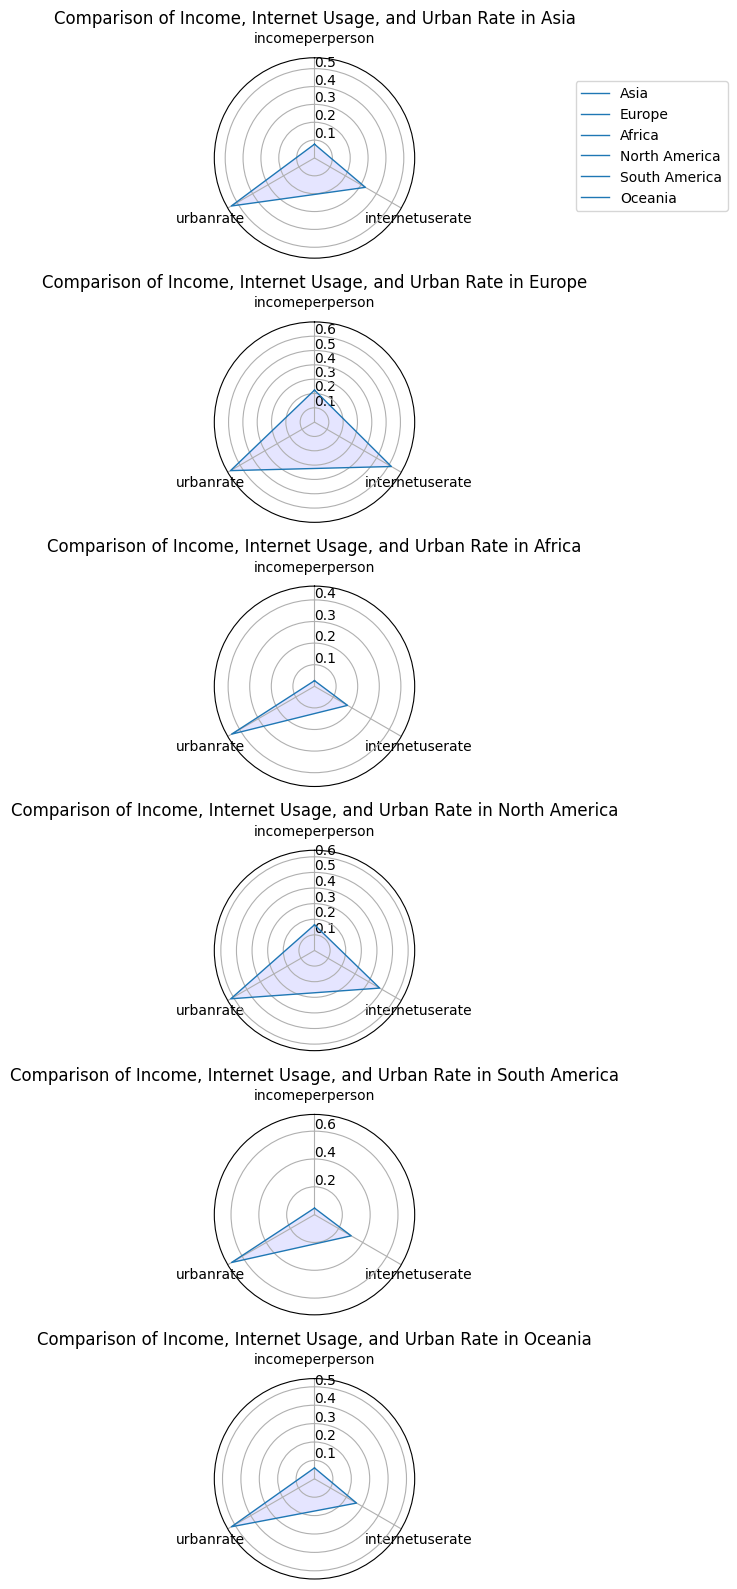

In [11]:

# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('gapminder_internet.csv')

# Create subplots for each continent's radar chart
fig, axs = plt.subplots(len(['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']), 1, figsize=(10, 16), subplot_kw=dict(polar=True))

# Define the highest values for normalization
max_income = 81647.10003
max_internet = 95.63811321
max_urban = 100

# Loop through each continent, filter data, normalize variables, and plot radar chart
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
for idx, continent in enumerate(continents):
    continent_data = data[data['continent'] == continent]
    
    # Normalize the data for each variable based on highest values
    def normalize_column(col, max_val):
        return col / max_val
    
    continent_data['incomeperperson'] = normalize_column(continent_data['incomeperperson'], max_income)
    continent_data['internetuserate'] = normalize_column(continent_data['internetuserate'], max_internet)
    continent_data['urbanrate'] = normalize_column(continent_data['urbanrate'], max_urban)

    # Compute the mean values for each variable in the continent
    variables = ['incomeperperson', 'internetuserate', 'urbanrate']
    mean_values = continent_data[variables].mean()

    # Number of variables
    num_variables = len(variables)

    # Create an array of angles for the radar chart
    angles = [n / float(num_variables) * 2 * 3.14159 for n in range(num_variables)]
    angles += angles[:1]

    # Create the radar plot for the current continent
    ax = axs[idx]
    ax.set_theta_offset(3.14159 / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_rlabel_position(0)

    # Plot the data for the current continent
    values = mean_values.values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=continent)
    ax.fill(angles, values, 'b', alpha=0.1)

    # Add title for each continent's radar chart
    ax.set_title(f"Comparison of Income, Internet Usage, and Urban Rate in {continent}")

# Add a common legend to the subplots
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
